In [81]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

Scenario 1: The training data in each class were generated from bivariate Gaussian distributions with uncorrelated components and different means.

Scenario 2: The training data in each class came from a mixture of 10 lowvariance Gaussian distributions, with individual means themselves distributed as Gaussian.

Ciano: Y < 1/2 <br />
orange: Y >= 1/2

In [1]:
def plot_regressao_linear(blue,orange,axis):
    X = np.mat(np.r_[blue,orange])
    Y = np.mat(np.r_[np.zeros(blue.shape[0]), np.ones(orange.shape[0])])

    betas = (X.T * X).I * X.T * Y
    
    X1model = np.arange(axis[0],axis[1],.1)
    X2model =  (1/2 - betas[1] * X1model - betas[0]) / betas[2]

    plt.plot(X1model,X2model)

In [442]:
((X.T - np.array([[x1],[x2]])) ** 2).sum(axis=0)

array([174.14442434, 166.54637871, 107.64025798, 145.68431016,
       113.1646715 , 136.90634884,  99.65662428, 136.24033427,
       165.73652797, 133.25858935, 117.85343786, 121.86409832,
       137.37957456, 125.86248043, 154.31311756, 129.45372839,
       103.17607485, 170.79992354, 140.31113405, 167.94595737,
       121.56265766, 144.22629316, 111.00620885, 183.97561542,
       127.70544465, 156.67682753, 156.68575875, 120.97809998,
       159.5926648 , 151.9565982 , 121.51060774, 156.22437817,
       100.77708701, 209.79581847, 142.69136835, 160.44389573,
       152.97836217, 158.11613069, 171.06908946, 184.62475054,
       121.36699015, 157.05039096, 156.52973723, 147.96743946,
       194.25651447, 149.37185718, 140.81252047, 151.91115552,
       156.87059754, 146.76499433, 183.20320158, 122.43855009,
       156.21724693, 147.88507451, 171.14008498, 140.51056441,
       147.10052021, 200.16360327, 171.07582282, 145.27988962,
       166.08843221, 144.48694696, 164.56362865, 144.11

In [454]:
def plot_k_vizinhos(blue,orange,axis,k=15):
    X = np.mat(np.r_[blue, orange])
    Y = np.mat(np.r_[np.zeros(blue.shape[0]), np.ones(orange.shape[0])])
    
    def k_vizinhos(x1, x2):
        return Y[((X.T - np.array([[x1],[x2]])) ** 2).sum(axis=0).argsort()[:k]].mean() < .5
    
    X1_model = np.arange(axis[0], axis[1],.2)
    X2_model = np.arange(axis[2], axis[3],.2)
    for x1 in X1_model:
        for x2 in X2_model: # facecolors='none', edgecolors='r'
            plt.plot(x1,x2,'s', color='blue' if k_vizinhos(x1,x2) else 'darkOrange',ms=1)

In [188]:
scenario1_blue = np.random.multivariate_normal([0, 1], np.eye(2),size=100)
scenario1_orange = np.random.multivariate_normal([1, 0], np.eye(2),size=100)

In [344]:
axis = [-3,3,-3,3]

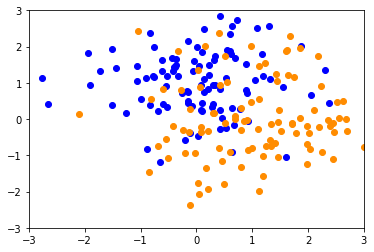

In [345]:
plt.plot(*scenario1_blue.T,'o',color='blue')
plt.plot(*scenario1_orange.T,'o',color='darkOrange')
plt.axis(axis)
plt.show()

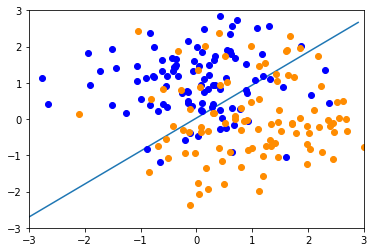

In [346]:
plot_regressao_linear(scenario1_blue,scenario1_orange,axis)
plt.plot(*scenario1_blue.T,'o',color='blue')
plt.plot(*scenario1_orange.T,'o',color='darkOrange')
plt.axis(axis)
plt.show()

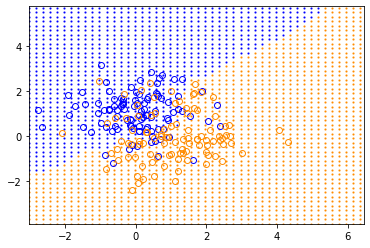

In [455]:
plot_k_vizinhos(scenario1_blue,scenario1_orange,axis)
plt.plot(*scenario1_blue.T,'o',markerfacecolor='none', mec='blue')
plt.plot(*scenario1_orange.T,'o',mfc='none', mec='darkOrange')
plt.axis(axis)
plt.show()

In [324]:
media_blue = np.random.multivariate_normal([0, 1], np.eye(2),size=10)
media_orange = np.random.multivariate_normal([1, 0], np.eye(2),size=10)

In [325]:
scenario2_blue = np.array([np.random.multivariate_normal(media,np.eye(2)) for media in media_blue[np.random.randint(media_blue.shape[0],size=100)]])
scenario2_orange = np.array([np.random.multivariate_normal(media,np.eye(2)) for media in media_orange[np.random.randint(media_blue.shape[0],size=100)]])

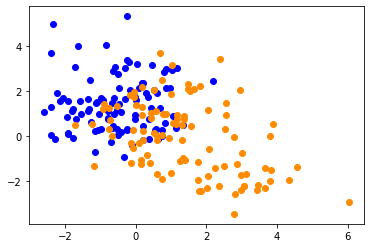

In [376]:
plt.plot(*scenario2_blue.T,'o',color='blue')
plt.plot(*scenario2_orange.T,'o',color='darkOrange')
axis = plt.axis()
plt.show()

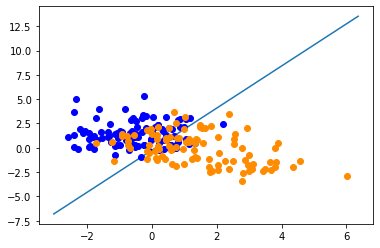

In [381]:
plot_regressao_linear(scenario2_blue,scenario2_orange,axis)
plt.plot(*scenario2_blue.T,'o',color='blue')
plt.plot(*scenario2_orange.T,'o',color='darkOrange')
plt.show()

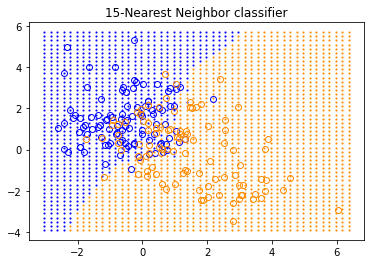

In [458]:
plot_k_vizinhos(scenario2_blue,scenario2_orange,axis)
plt.plot(*scenario2_blue.T,'o',mfc='none', mec='blue')
plt.plot(*scenario2_orange.T,'o',mfc='none', mec='darkOrange')
plt.title("15-Nearest Neighbor classifier")
plt.show()

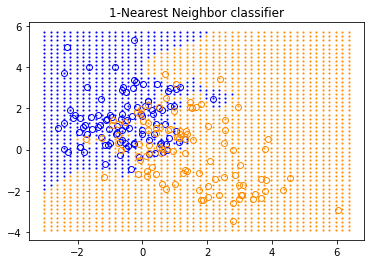

In [459]:
plot_k_vizinhos(scenario2_blue,scenario2_orange,axis,k=1)
plt.plot(*scenario2_blue.T,'o',mfc='none', mec='blue')
plt.plot(*scenario2_orange.T,'o',mfc='none', mec='darkOrange')
plt.title("1-Nearest Neighbor classifier")
plt.show()